In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os


def symbol_to_path(symbol, base_dir='data'):
    """Return csv file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    
    # add SPY for reference, if absent
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(
            symbol_to_path(symbol),
            index_col='Date',
            parse_dates=True,
            usecols=['Date', 'Adj Close'],
            na_values=['nan'])
    
        # rename to prevent crashing
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        # Join
        df = df.join(df_temp, how='inner')
        
        # drop dates SPY did not trade
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df


def plot_data(df, title="Stock prices", xlabel='Date', ylabel='Prices'):
    """Plot stock prices with a custom title and meaningful axis labels"""
    ax = df.plot(title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

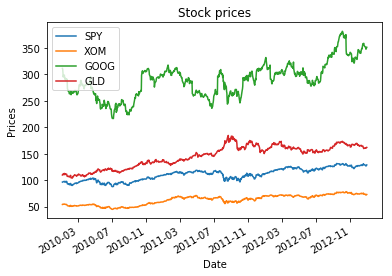

In [3]:
# Get data
dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
df = get_data(symbols, dates)

# Plot data
plot_data(df)

### Global Statistics
mean, median, std, sum, prod, mode ...

In [4]:
df.mean()

SPY     110.620757
XOM      62.766982
GOOG    289.274140
GLD     145.029775
dtype: float64

In [5]:
df.std()

SPY     11.490678
XOM      9.103415
GOOG    32.920252
GLD     20.897316
dtype: float64

In [6]:
df.median()

SPY     111.666004
XOM      65.462989
GOOG    290.766358
GLD     150.294998
dtype: float64

In [7]:
df.sum()

SPY      83408.050746
XOM      47326.304388
GOOG    218112.701900
GLD     109352.450110
dtype: float64

### Rolling Statistics
rolling mean, rolling std...

#### Rolling mean
mean value in a window(eg: window = 20 datapoints)

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  del sys.path[0]


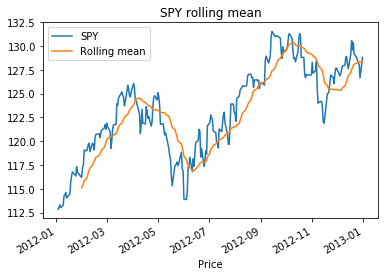

In [8]:
# Get data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Plot data
ax = df['SPY'].plot(
    title='SPY rolling mean',
    label='SPY'
)

# Compute rolling mean using a 20-day window
rm_SPY = pd.rolling_mean(df['SPY'], window=20)

# Add rolling mean to plot
rm_SPY.plot(
    label='Rolling mean',
    ax = ax
)

# Add axies labels and legend
ax.set_xlabel('Date')
ax.set_xlabel('Price')
ax.legend(loc='upper left')

plt.show()

#### Bollinger Bands
A way of quantifying how far stock price has deviated from some norm.
![](./img/1_04_Bollinger_Bands.jpg "Bollinger bands")

In [9]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window)


def get_bollinger_bands(rolling_mean, rolling_std):
    """Return upper and lower Bollinger Bands."""
    upper_band = rolling_mean + rolling_std * 2
    lower_band = rolling_mean - rolling_std * 2
    return upper_band, lower_band

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


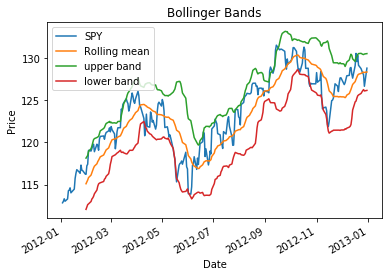

In [10]:
# Read data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

#### Daily return
Day-to-day change in stock price.
![](./img/1_04_Daily_Returns.jpg "Daily Returns")

In [11]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""

    # Copy given DataFrame to match size and column names
    daily_returns = df.copy()
    
    # Compute daily returns for row 1 onwards
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    
    # Set daily returns for row 0 to 0
    daily_returns.iloc[0, :] = 0
    
    return daily_returns

def compute_daily_returns_pandas(df):
    """Compute and return the daily return values."""
    daily_returns = (df / df.shift(1)) - 1
    
    # Set daily returns for row 0 to 0
    daily_returns.iloc[0, :] = 0
    return daily_returns

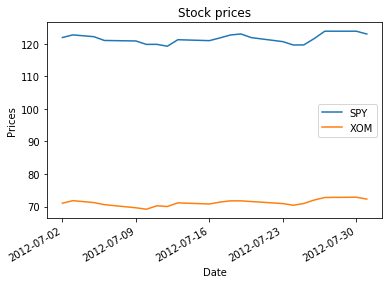

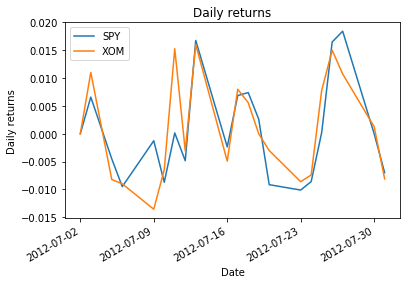

In [12]:
 # Read data
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)

# Plot data
plot_data(df)

# Compute and plot daily returns
daily_returns = compute_daily_returns_pandas(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")